## Подключимся к Google Sheets напрямую

In [3]:
!pip install gspread oauth2client

In [81]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

# Определите область применения API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

# Подключите файл с учетными данными (укажите путь к .json файлу, который вы скачали ранее)
creds = ServiceAccountCredentials.from_json_keyfile_name('tidal-axis-312019-f983310213b2.json', scope)

# Авторизация и подключение к Google Sheets API
client = gspread.authorize(creds)

# Откройте таблицу по ссылке (по ее ID)
sheet = client.open_by_key('1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs')

# Выберите нужный лист по его имени или индексу
worksheet = sheet.get_worksheet(0)  # или используйте имя: sheet.worksheet('Имя листа')

# Конфликт региональных настроек, "." считывается как разделитель тысяч. Читаем все как текст, затем меняем.
data = worksheet.get_all_values()

# Пример: вывод данных
print(data[1])

df = pd.DataFrame(data[1:], columns=data[0])
df = df.map(str)  # всё в строки
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

print(df['Sales'].max())
print(df['Sales'].dtype)
print(df['Sales'].describe())
print(df['Sales'].head(10))

# Проверка первых 5 строк таблицы
print(df.head())

['646', '30/12/2018', 'Стандарт', 'Урал', 'Appliances', '37229,08']
44995.41
float64
count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64
0    37229.080
1    20994.610
2    42133.860
3    10612.000
4    28781.130
5     7366.876
6    42478.360
7    11542.820
8     1783.405
9    26200.090
Name: Sales, dtype: float64
     ID Order Date     Class       Region Sub-Category     Sales
0   646 2018-12-30  Стандарт         Урал   Appliances  37229.08
1   907 2018-12-30  Стандарт  Владивосток    Bookcases  20994.61
2   908 2018-12-30  Стандарт  Владивосток       Phones  42133.86
3   909 2018-12-30  Стандарт  Владивосток      Binders  10612.00
4  1297 2018-12-30  Стандарт   Калиниград      Binders  28781.13


## Наиболее часто покупаемые за всё время

In [13]:
# Преобразуем Order_date в формат даты
df['Order_date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

subcategory_counts = df['Подкатегория'].value_counts().head(4)

print("Наиболее часто покупаемые:")
print(subcategory_counts)

Наиболее часто покупаемые подкатегории за все время:
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64


## Наиболее часто покупаемые за 2 года

In [26]:
# Определим сегодняшнюю дату
today = pd.Timestamp.today()
print('Сегодня', today)
print()
subcategory_counts_2 = df[(df['Order_date'] >= '2017-01-01') & (df['Order_date'] <= '2018-12-31')]['Sub-Category'].value_counts().head(4)

print("Наиболее часто покупаемые подкатегории за последние два года:")
print(subcategory_counts_2)
print()
print('Первая дата: ', df['Order_date'].min())
print('Последняя дата: ', df['Order_date'].max())

Сегодня 2024-09-17 13:30:51.979784

Наиболее часто покупаемые подкатегории за последние два года:
Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Name: count, dtype: int64

Первая дата:  2015-01-03 00:00:00
Последняя дата:  2018-12-30 00:00:00


## Наиболее часто покупаемые за 1 год

In [29]:
subcategory_counts_3 = df[(df['Order_date'] >= '2018-01-01') & (df['Order_date'] <= '2018-12-31')]['Sub-Category'].value_counts().head(4)

print("Наиболее часто покупаемые подкатегории за последний год:")
print(subcategory_counts_3)
print()
print('Первая дата: ', df['Order_date'].min())
print('Последняя дата: ', df['Order_date'].max())

Наиболее часто покупаемые подкатегории за последний год:
Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Name: count, dtype: int64

Первая дата:  2015-01-03 00:00:00
Последняя дата:  2018-12-30 00:00:00


### Вывод: популярные товары не меняются, временной динамики пока нет. Продаётся примерно одинаковое количество товаров в каждой подкатегории за равные промежутки времени.

## Box and whiskers plot

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64


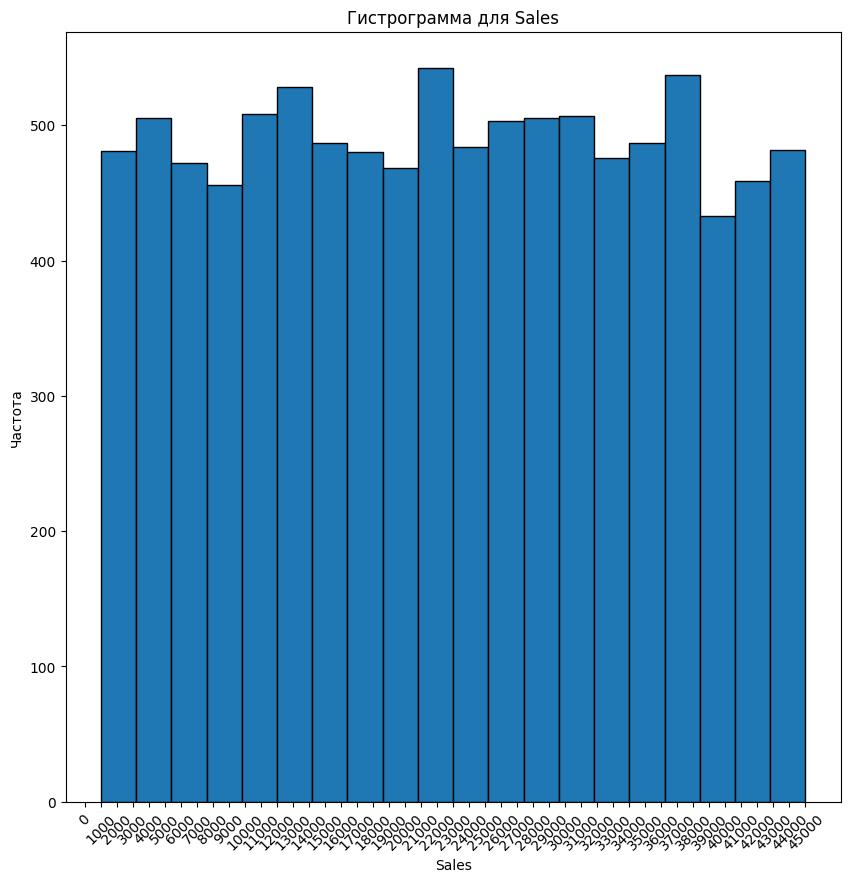

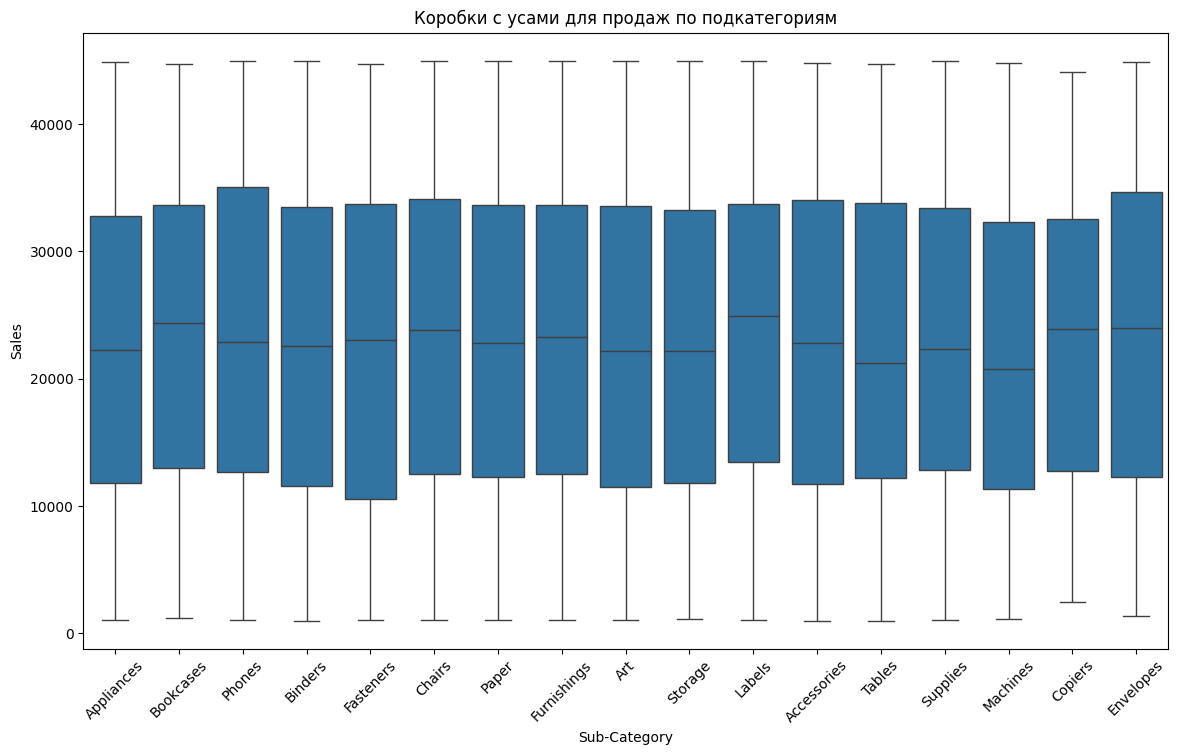

Sub-Category: Appliances
  Mean Sales: 22579.91176470588
  Стандартное отклонение: 12663.53844266108
  Минимальная продажа: 1032.233
  Максимальная продажа: 44896.37
  Отношение макс./средн.: 1.99

Sub-Category: Bookcases
  Mean Sales: 23686.751154867256
  Стандартное отклонение: 11970.65311689239
  Минимальная продажа: 1169.509
  Максимальная продажа: 44736.68
  Отношение макс./средн.: 1.89

Sub-Category: Phones
  Mean Sales: 23222.90634589041
  Стандартное отклонение: 12693.116144767662
  Минимальная продажа: 1073.054
  Максимальная продажа: 44990.44
  Отношение макс./средн.: 1.93

Sub-Category: Binders
  Mean Sales: 22729.20529289544
  Стандартное отклонение: 12648.437302125894
  Минимальная продажа: 1002.794
  Максимальная продажа: 44992.43
  Отношение макс./средн.: 1.97

Sub-Category: Fasteners
  Mean Sales: 22146.975341121495
  Стандартное отклонение: 13343.590286168592
  Минимальная продажа: 1046.917
  Максимальная продажа: 44688.63
  Отношение макс./средн.: 2.03

Sub-Category: 

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
print(df['Sales'].describe())

plt.figure(figsize=(10, 10))
plt.hist(df['Sales'], bins=20, edgecolor='k')

plt.title('Гистрограмма для Sales')
plt.xlabel('Sales')
plt.ylabel('Частота')

plt.xticks(ticks=range(0, int(df['Sales'].max()) + 1000, 1000), rotation=45)

plt.show()

# Фильтрация данных для исключения аномалий
filtered_df = df[(df['Sales'] >= mean_sales - 3 * std_sales) & 
                 (df['Sales'] <= mean_sales + 3 * std_sales)]

plt.figure(figsize=(14, 8))  # Увеличиваем размер графика для лучшего отображения
sns.boxplot(x='Sub-Category', y='Sales', data=filtered_df)
plt.xticks(rotation=45)  # Поворачиваем метки оси X для лучшего восприятия
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Коробки с усами для продаж по подкатегориям')

plt.show()

for category in df['Sub-Category'].unique():
    sub_df = df[df['Sub-Category'] == category]
    mean_sales = sub_df['Sales'].mean()
    std_sales = sub_df['Sales'].std()
    print(f'Sub-Category: {category}')
    print(f'  Mean Sales: {mean_sales}')
    print(f'  Стандартное отклонение: {std_sales}')
    print(f'  Минимальная продажа: {sub_df["Sales"].min()}')
    print(f'  Максимальная продажа: {sub_df["Sales"].max()}')
    ratio = max_sales / mean_sales
    print(f'  Отношение макс./средн.: {ratio:.2f}')
    print()

for category in df['Sub-Category'].unique():
    sub_df = df[df['Sub-Category'] == category]
    mean_sales = sub_df['Sales'].mean()
    max_sales = sub_df['Sales'].max()
    
    

### Чаще всего совершаются продажи на 21000 и 37000 рублей.
### Больше дохода с одной продажи приносят Phones, Envelopes.
### Тем не менее, среднеквадратичные отклонения, отношения максимальной и средней продажи и даже сами максимумы продаж по подкатегориям близки друг к другу.